<font size = '5'> Описание проекта </font>

Вы работаете в интернет-магазине <b>«Стримчик»</b>, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, <b>Xbox</b> или <b>PlayStation</b>). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br/><br/>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br/><br/>
В наборе данных попадается аббревиатура <b>ESRB (Entertainment Software Rating Board)</b> — это ассоциация, определяющая возрастной рейтинг компьютерных игр. <b>ESRB</b> оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|

<font size = '5'> Описание данных </font>

* <b>Name</b> — название игры
* <b>Platform</b> — платформа
* <b>Year_of_Release</b> — год выпуска
* <b>Genre</b> — жанр игры
* <b>NA_sales</b> — продажи в Северной Америке (миллионы долларов)
* <b>EU_sales</b> — продажи в Европе (миллионы долларов)
* <b>JP_sales</b> — продажи в Японии (миллионы долларов)
* <b>Other_sales</b> — продажи в других странах (миллионы долларов)
* <b>Critic_Score</b> — оценка критиков (максимум 100)
* <b>User_Score</b> — оценка пользователей (максимум 10)
* <b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

#  Откройте файл с данными и изучите общую информацию

<font size = '3'> **Задание 1.** Откройте файл `/datasets/games.csv`, сохраните датафрейм в переменную `games`. </font>

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import ttest_ind

games = pd.read_csv('/datasets/games.csv', decimal = ',')

<b> </b>
<font size = '3'> **Задание 2.** Выведите первые 20 строчек датафрейма `games` на экран. </font>

In [71]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.2,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.5,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.7,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<font size = '3'> **Задание 3.** Выведите основную информацию о датафрейме с помощью метода `info()`. </font>

In [72]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             16713 non-null  object
 1   Platform         16715 non-null  object
 2   Year_of_Release  16446 non-null  object
 3   Genre            16713 non-null  object
 4   NA_sales         16715 non-null  object
 5   EU_sales         16715 non-null  object
 6   JP_sales         16715 non-null  object
 7   Other_sales      16715 non-null  object
 8   Critic_Score     8137 non-null   object
 9   User_Score       10014 non-null  object
 10  Rating           9949 non-null   object
dtypes: object(11)
memory usage: 1.4+ MB


# Подготовьте данные

<font size ='3'> **Зaдание 1:** Замените названия столбцов (приведите к нижнему регистру) </font>

In [73]:
#games = games.str.lower()
games = games.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release':'year_of_release', 'Genre': 'genre', 'NA_sales':'noram_sales', 'EU_sales':'europe_sales', 'JP_sales': 'japan_sales','Other_sales':'other_sales', 'Critic_Score': 'critic_score','User_Score':'user_score', 'Rating': 'rating_type'}) 
#games.columns = games.columns.str.lower()

Проверяем что случилось:

In [74]:
games.head(30)

,name,platform,year_of_release,genre,noram_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating_type
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.2,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.5,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.7,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<font size ='3'> **Зaдание 2:** Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему?</font>

In [75]:
# Приведите данные к нужным типам
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             16713 non-null  object
 1   platform         16715 non-null  object
 2   year_of_release  16446 non-null  object
 3   genre            16713 non-null  object
 4   noram_sales      16715 non-null  object
 5   europe_sales     16715 non-null  object
 6   japan_sales      16715 non-null  object
 7   other_sales      16715 non-null  object
 8   critic_score     8137 non-null   object
 9   user_score       10014 non-null  object
 10  rating_type      9949 non-null   object
dtypes: object(11)
memory usage: 1.4+ MB


**user_score, critic_score,  other_sales, japan_sales, noram_sales, europe_sales, и year_of_release** - это же численный показатель, а имеет тип **object** - меняем на **'float'**.

Остальные типы столбцов в порядке.

<font size = '3'> <b> Преобразуем тип данных </b> </font>

In [76]:
list_to_float = ['year_of_release',
 'noram_sales',
 'europe_sales',
 'japan_sales',
 'other_sales',
 'critic_score']

for column in list_to_float:
    games[column] = games[games[column].notnull()][column].apply(pd.to_numeric)

In [77]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   noram_sales      16715 non-null  float64
 5   europe_sales     16715 non-null  float64
 6   japan_sales      16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating_type      9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<font size = '3' ><b> Понимание аббревиатуру 'tbd' в столбце `user_score`</b></font>

In [78]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,noram_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating_type
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В начале скажу расшивровку и объясню что значит:

**'tbd'** расшифровается на английском как - **'to be declared'** или **'to be announced'** .
Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
Сказая это, мы можем понять что это как-то связано с тем насколько игра популярно; игра популярная,то геймеры покупают ее, алгоритм увеличивается и вероятность того,что болше количество игроки оценивают игру увеличивается.такое вполне возможно.

Числовой тип столбца нам необходим. Т.к. 'tbd' фактически и является NaN, заменим и NaN, и 'tbd' на значение -1 и приведем значение столбца к числовому:

In [79]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

- <font size = '3'> <b> Обработаем пропуски:</b> </font>

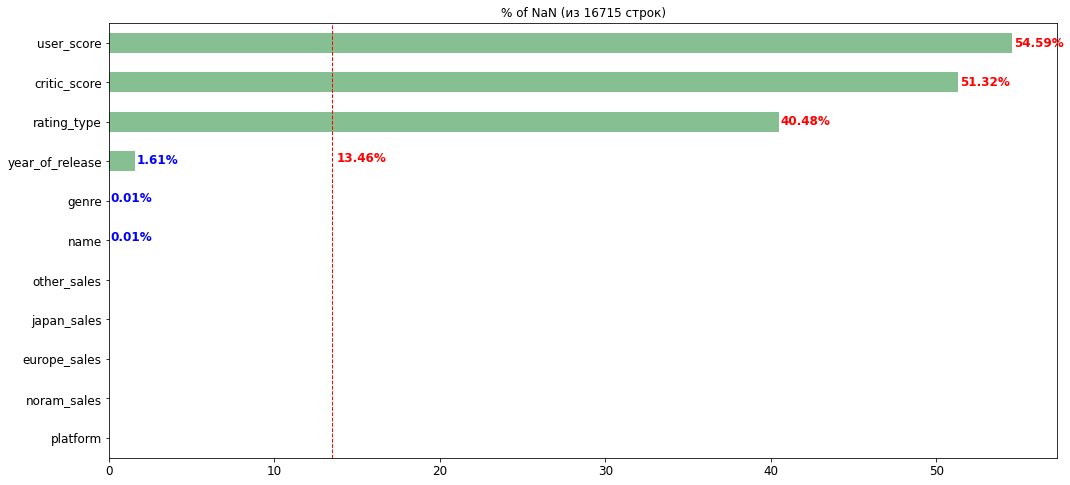

In [80]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (из {} строк)'.format(len(df)), 
                               color='#86bf91', legend=False, fontsize=12)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold

plot, threshold = percent_hbar(games)

<font size = '3'>Как поступим: </font>

**critic_score** - оценка критиков - вполне возможно, что игры не оценивались критиками, т.к. тогда не было такого "обычая". Было бы неправильно заполнить рейтинг игры средним или медианой, даже если бы мы их считали внутри для каждого жанра отдельно. Тем не менее, чтобы иметь возможность быстрой фильтрации данных и возможность их беспрепятственно обрабатывать, поставим этим играм рейтинг -1 (вдруг у какой-то игры есть нулевой рейтинг, поставив -1, мы никогда не перемешаем игры с NaN и с реально нулевым рейтингом);

**rating_type** - рейтинг от ESRB - может быть, в те времена не было такой организации, вот и рейтинга от неё тоже нет. Здесь то же самое. Невозможно дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Поставим рейтинг "No ESRB";

**user_score** - те же причины, вероятно, ранее не было сервисов, которые собирали бы рейтинги игроков. Поэтому и присутствуют пропуски. Поступим так же, как и со столбцом critic_score.

Остальные пропуски меньше 5%, тогда можно их просто удалить.

У нас к обработке столбцы **critic_score** и **user_score** - заполним пропуски значением -1.

In [81]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

In [82]:
print('Количество пропусков в столбце critic_score - {}'.format(games['critic_score'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(games['user_score'].isnull().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0


круто!!

In [83]:
games['name'] = games['name'].dropna().reset_index(drop = True)
games['genre'] = games['genre'].dropna().reset_index(drop = True)

In [130]:
print('Количество пропусков в столбце critic_score - {}'.format(games['name'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(games['genre'].isnull().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0


In [84]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   noram_sales      16715 non-null  float64
 5   europe_sales     16715 non-null  float64
 6   japan_sales      16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating_type      9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Посмотрим ещё раз на статистику по пропускам:

(<AxesSubplot:title={'center':'% of NaN (из 16715 строк)'}>, 3.828181818181818)

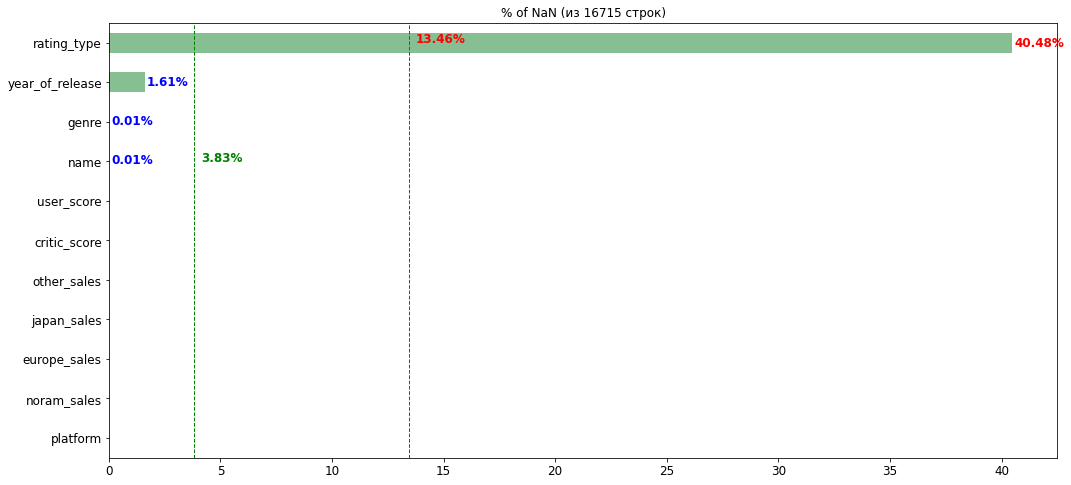

In [85]:
percent_hbar(games, threshold)

Другое дело - средний процент незаполненности данных равен 3,8%.

<font size = '3'> **Задача 3 :** Отдельный столбец с суммой продаж по всем регионам 'sales_total': </font>

In [86]:
#games['total_sales'] = games['japan_sales'] + games['noram_sales'] + games['europe_sales'] + games['other_sales']

games['total_sales'] = games[['noram_sales','europe_sales','japan_sales', 'other_sales']].sum(axis = 1)

In [87]:
games.head(10)

,name,platform,year_of_release,genre,noram_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN,28.31


# Проведите исследовательский анализ данных

Т.к. далее нам придется рисовать не одну диаграмму, напишем под это функцию:

In [88]:
def create_any_bar(groupby_column, func, y='name'):
    title_dict = {'year_of_release' : 'Количество продажи в зависимости от времени', 
                 'platform' : 'Количество продажи в зависимости от платформа' , 
                 }
    plt.style.use('seaborn-pastel')
    df_to_plot = games.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black', title=title_dict[groupby_column])
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, ec='black', title=title_dict[groupby_column])

Поехали!!

<font size = '3'> **Задача 1 :** Количество выпущенных игр по годам:</font>

Посмотрим, сколько игр выпускалось в каждый из представленных в наших данных годов:

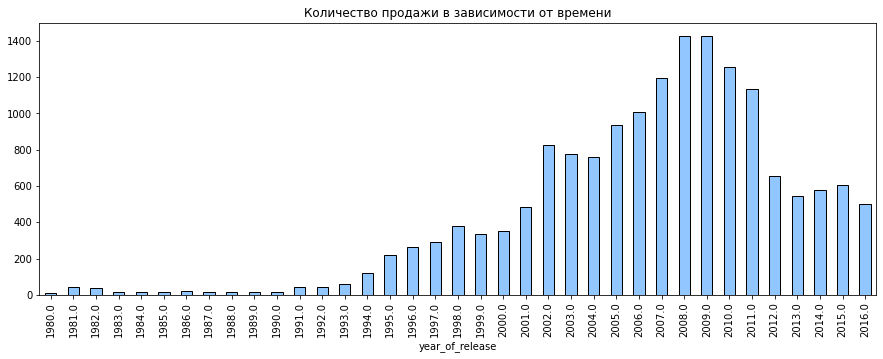

In [89]:
create_any_bar('year_of_release', 'count')

До 1994 года и Pentium 1 игр практически не было. Потом они начали появляться, сначала на MS-DOS, потом уже на Windows. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств, интеграция соц. сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.

<font size = '3'> **Задача 2.1:** Количество выпущенных игр по платформам:</font>

Посмотрим на то, сколько игр выпускалось на каждую платформу за весь анализируемый период:

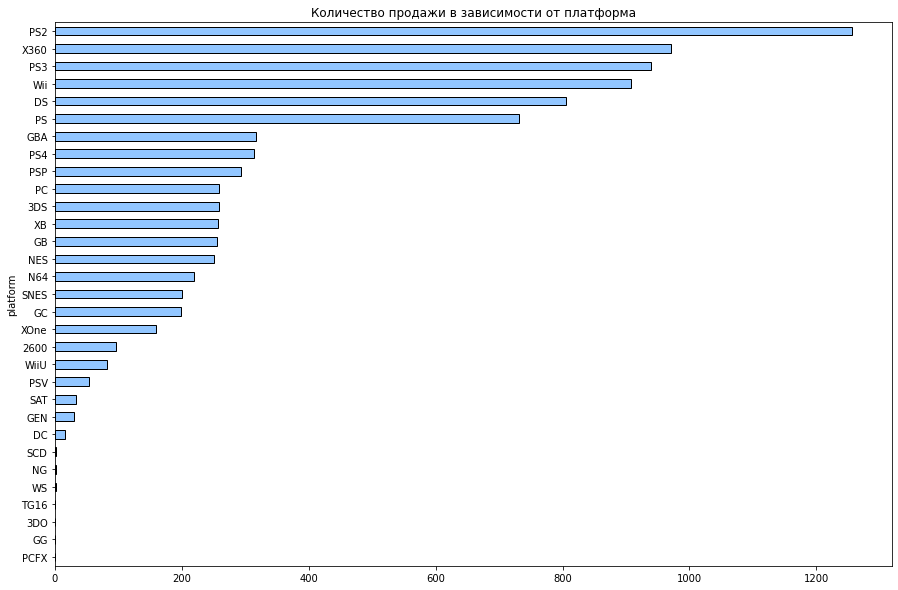

In [90]:
create_any_bar('platform', 'sum', 'total_sales')

Безусловным лидером является платформа PS2. Ожидаемо, она у всех давно на слуху. Каждый играл на ней, как минимум, в детстве.
Далее идут Xbox360, PS3 и Wii.
вау,неожидано

Самые редкие платформы - представители японских технологий.

<font size = '3'> **Задача 2.2 :** Динамика продаж игр по платформам:</font>

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: за какой характерный срок появляются новые и исчезают старые платформы?

Для возможности понимания, какой платформе какой график принадлежит, воспользуемся модулем mplcursors

In [91]:
!pip install mplcursors

**Функция для прорисовки графиков line create_any_lines:**

In [92]:
def create_any_lines(platforms=None, query=None):
    %matplotlib notebook
    plt.style.use('tableau-colorblind10') 
    
    ax = plt.gca()
    legend_list = []
    if query == None:
        if platforms == None:
            bbox_y = 1.08
            legend_size = 7
            platforms = games['platform'].unique().tolist()
        else:
            platforms = platforms
            bbox_y = 0.97
            legend_size = 9
    else:
        platforms = games.query(query)['platform'].unique().tolist()
        bbox_y = 0.97
        legend_size = 9
        
    for platform in platforms:
        if query == None:
            df_to_plot = games.query('platform == @platform')
        else:
            df_to_plot = games.query('platform == @platform').query(query)
        lines = df_to_plot.groupby('year_of_release' )['total_sales'].sum().plot(x='year_of_release', y='total_sales',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(10,5))
        legend_list.append(platform)
    
    ax.set_xlabel('')
   
    ax.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))



<IPython.core.display.Javascript object>


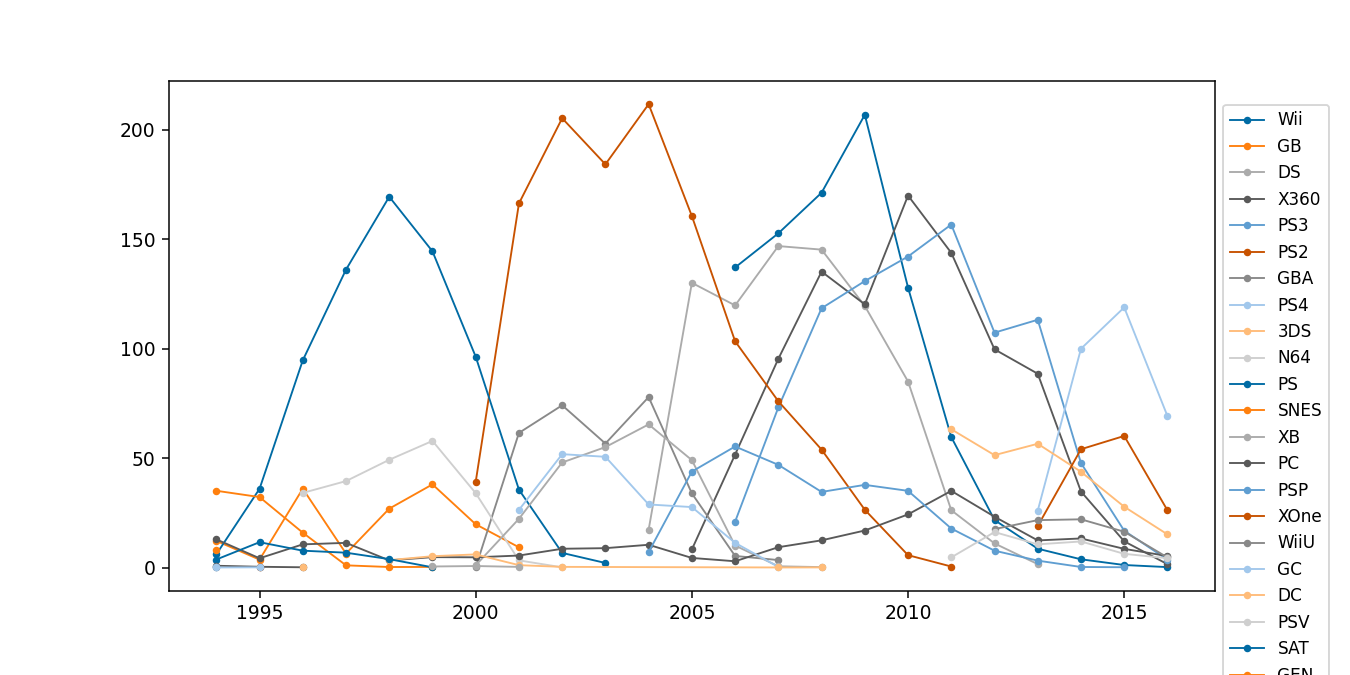

In [93]:
create_any_lines(query = 'year_of_release >= 1994')

Выберем топ платформ, по которым были самые большие суммарные продажи игр за весь рассматриваемый период:

In [94]:
games.groupby('platform')['total_sales'].sum().to_frame('total_sales').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Выберем топ 6

In [95]:
top_platforms = ['Wii','PS2', 'X360', 'DS','PS3', 'PS']

**График динамики продаж по годам по топ-6 платформ:**

<IPython.core.display.Javascript object>


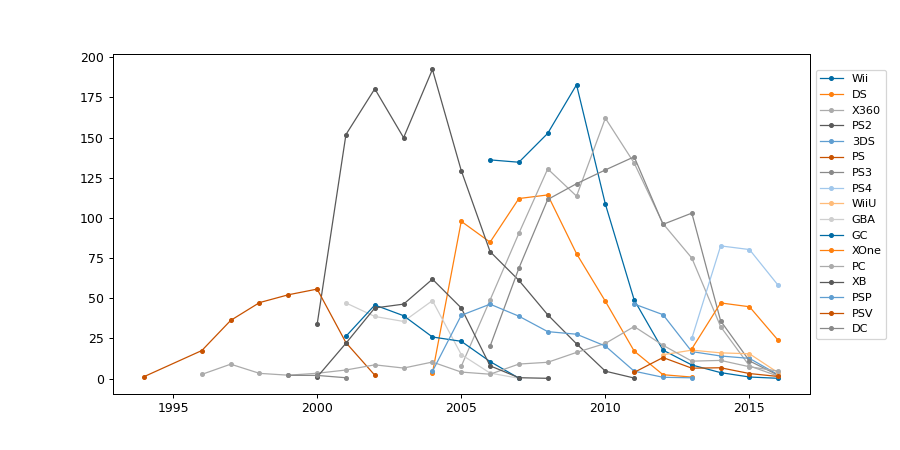

In [131]:
create_any_lines(platforms = top_platforms,query = 'year_of_release >= 1994')

Посмотрим, сколько "живут" консоли.

PS - прожила с 1994 года до 2003, почти 10 лет;

PS2 - с 2000 до 2011 года - 11 лет;

PS3 - с 2006 по настоящее время ещё живёт, но начала сильно сдавать позиции с выходом в 2013 году PS4;

DS - вышла в 1985, потом вообще нет данных, скорее всего, по той причине, что они не собирались. И с 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год - 8 активных лет жизни;

Wii - с 2006 по нынешний день, но в 2016 уже почти изжила себя - опять 10 лет.
Таким образом, в среднем консоль живет 10 лет. И жила бы больше, если б не выходили более новые консоли. Но это неизбежно, т.к. прогресс идет вперед и "железо" в старых консолях перестает отвечать техническим требованиям новых игр.

<font size = '3'> Задача 3:  Динамика продаж игр в наше время: </font>

как мы поняли, платформы в средем живут около 10 лет

Прогноз надо строить ля 2017 года; строить графики > 2005

<IPython.core.display.Javascript object>


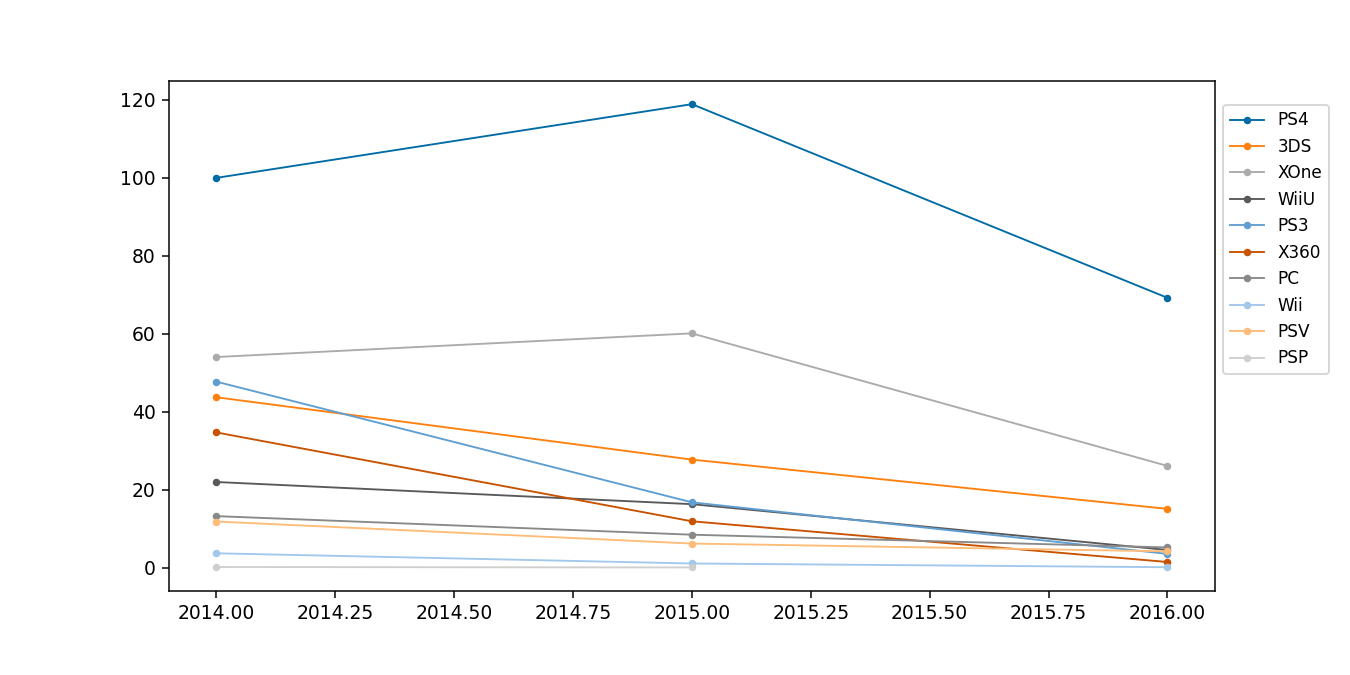

In [97]:
create_any_lines(query='year_of_release >= 2014')

**На конец** 2016 года лидируют по продажам следующие платформы:

- **PS4**;
- **ХОne**;
- **3DS**.

**Это топ-3**. Причем, исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.

<font size = '3'> **Задание 4:** Boxplot по глобальным продажам игр и с разбивкой по платформам. </font>

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Оценим разницу в продажах и в средних продажах на разных платформах. Опишем результат.

In [98]:
games.describe()

,year_of_release,noram_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,total_sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,33.060844,2.689447,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,36.299555,4.169833,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


<font size = '3' > Функция для прорисовки boxplot create_any_sales_boxplot. </font>

In [99]:
def create_any_sales_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = games.boxplot(column='total_sales', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = games.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='total_sales', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

 <font size = '3'>Boxplot по глобальным продажам игр. </font>

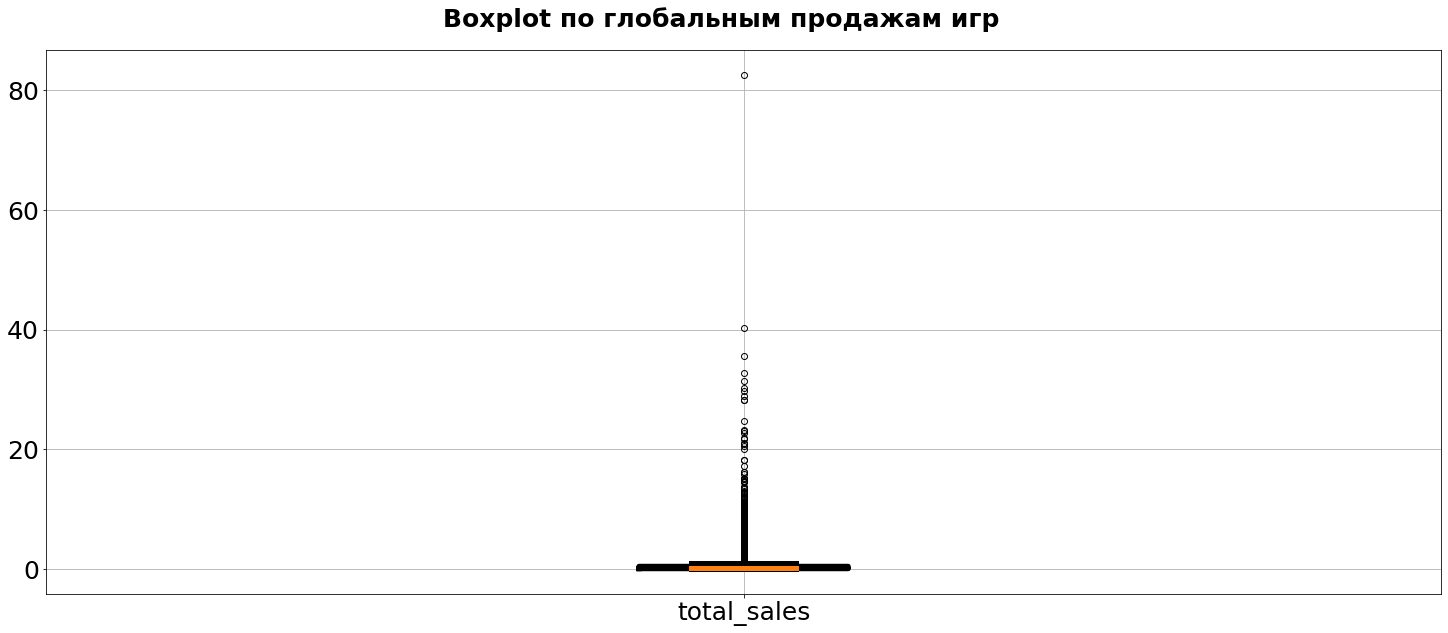

In [100]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр')

Посмотрим ближе:

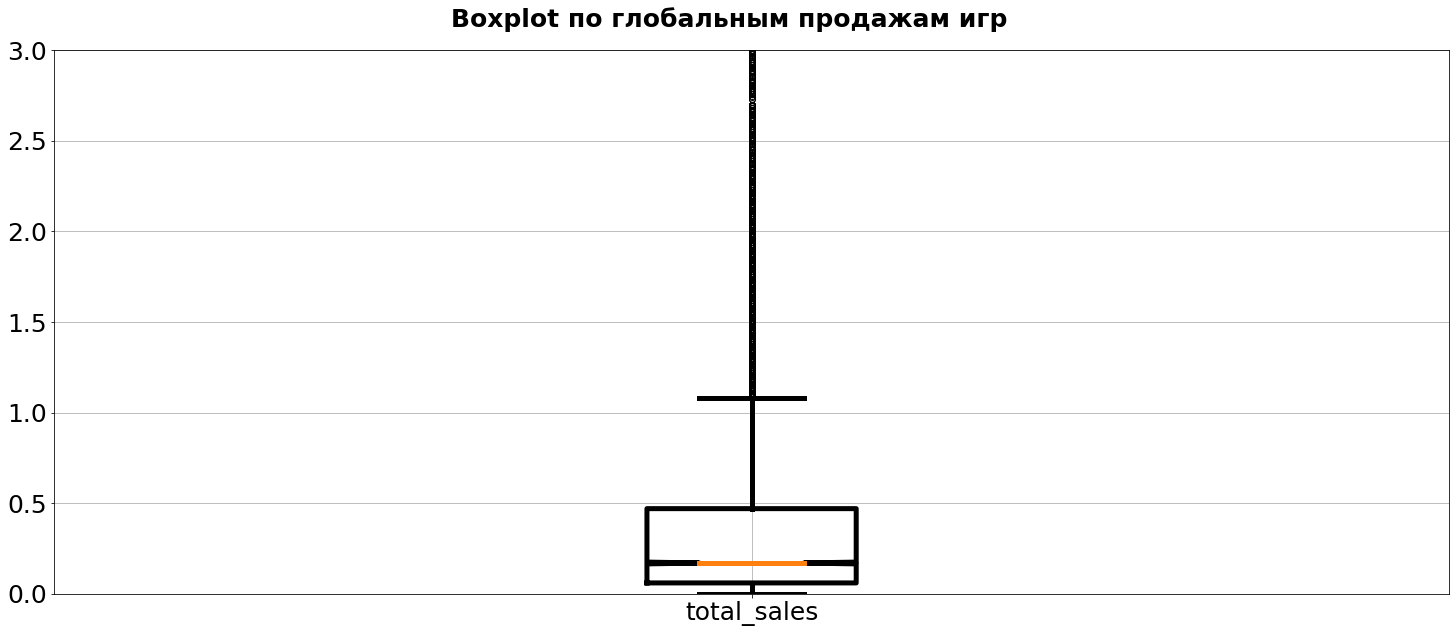

In [101]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр', ylims=[0,3])

Все или ничего, в общем обычная судьба игроделов - выпустить какую-нибудь игру и заработать на этом немного деньжат, не факт, что не в минус. Но игровые конгломераты не дремлют и устраивают AAA-выбросы рынку.

В среднем, продажи игр составляют до 1,2 млн долларов. Медиана - 0,2 миллиона долларов. Не сказать, что это много.

Сейчас смотрим для каждой платформы по отдельности:

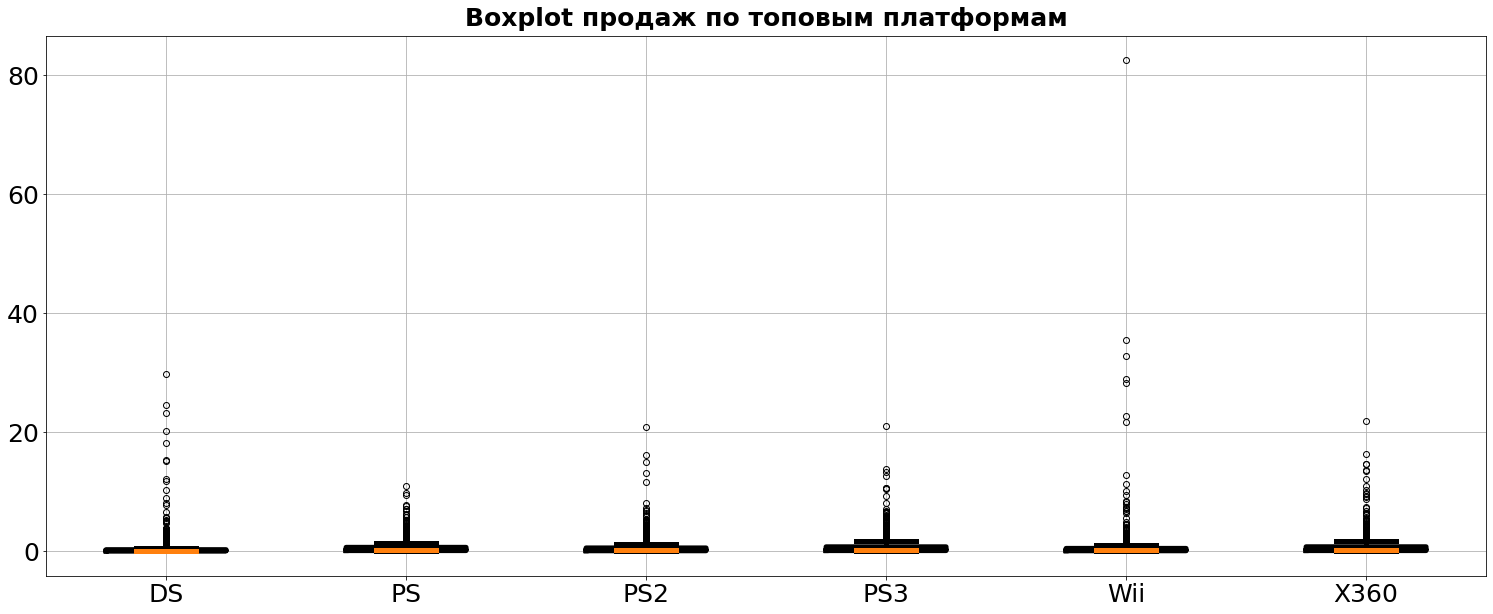

In [102]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
create_any_sales_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms")

Посмотрим ближе:

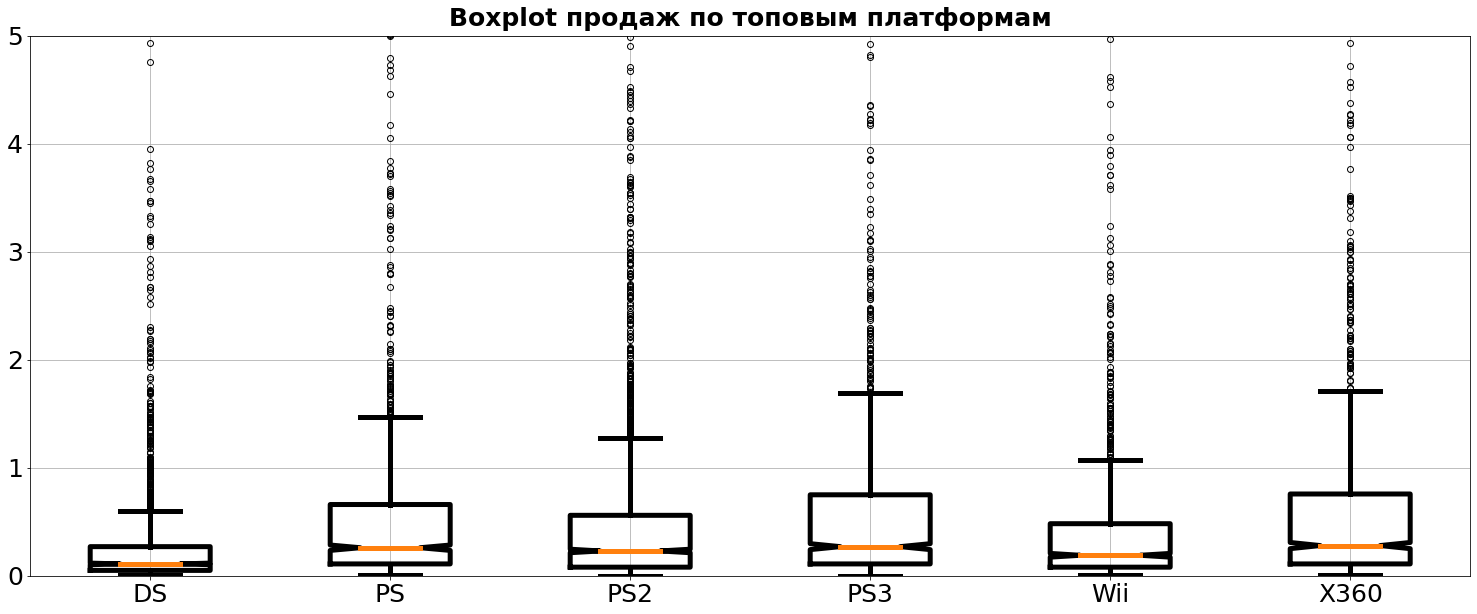

In [103]:
create_any_sales_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms",ylims = (0,5))

Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру.<br/>
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов.<br/>
У остальных - от 1 до 1,5 миллионов долларов.<br/>
Среди всех выделяется Nintendo DS - у него эти показатели сильное ниже. Медиана < 0,1 миллиона долларов, верхняя граница - 0,6 млн. 

<font size = '3'> **Задание 5:** выоды с продажами и рапределение игр: </font>

<font size = '3' >Узнайте, на какой платформе было выпущено больше всего игр </font>

In [104]:
most_popular_platform = games.groupby('platform').agg({'name':'count'}).reset_index()
most_popular_platform.sort_values(by='name', ascending=False).head()

,platform,name
16,PS2,2161
4,DS,2151
17,PS3,1331
26,Wii,1320
28,X360,1262


Плейстейшн 2 побеждает.

<font size = '3' > Определите, игр какого жанра больше всего </font>

In [105]:
most_popular_genre = games.groupby('genre').agg({'name':'count'}).reset_index()
most_popular_genre.sort_values(by='name', ascending=False).head()

,genre,name
0,Action,3369
10,Sports,2348
3,Misc,1750
7,Role-Playing,1498
8,Shooter,1323


Экшен победил.

<font size = '3' > Найдите игры с наибольшей и наименьшей оценкой: </font>

- от пользователей
- от критиков

Оцените корреляцию между оценками критиков и пользовательскими оценками

In [106]:
games[games['user_score'] > 0].sort_values(by='user_score').head()

,name,platform,year_of_release,genre,noram_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating_type,total_sales
13682,Arcana Heart 3,Wii,2008.0,Fighting,0.04,0.00,0.0,0.00,-1.0,0.2,E,0.04
9970,Harvey Birdman: Attorney at Law,PS3,2016.0,Adventure,0.07,0.02,0.0,0.02,-1.0,0.2,E,0.11
5764,Manhunt 2,DS,2006.0,Action,0.27,0.01,0.0,0.02,-1.0,0.3,E,0.30
13380,Ys: The Ark of Napishtim,Wii,2007.0,Role-Playing,0.04,0.00,0.0,0.00,-1.0,0.3,E,0.04
10262,Dynasty Tactics 2,XB,2005.0,Strategy,0.08,0.02,0.0,0.00,39.0,0.5,E,0.10


In [107]:
games[games['user_score'] > 0].sort_values(by='user_score', ascending = False).head()

,name,platform,year_of_release,genre,noram_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating_type,total_sales
14412,Atelier Shallie Plus: Alchemists of the Dusk Sea,PSP,2005.0,Role-Playing,0.00,0.02,0.00,0.01,-1.0,9.7,T,0.03
8975,Making History: The Great War,GBA,2003.0,Strategy,0.10,0.04,0.00,0.00,83.0,9.6,E,0.14
3417,Backyard NBA Basketball,GBA,2003.0,Sports,0.34,0.13,0.11,0.01,81.0,9.6,E,0.59
11119,Fate/Extella: The Umbral Star,GBA,NaN,Action,0.06,0.02,0.00,0.00,83.0,9.5,E,0.08
10105,Pro Yaky? Spirits 5,DS,2007.0,Sports,0.10,0.00,0.00,0.01,-1.0,9.5,E,0.11


In [108]:
games[games['critic_score'] > 0].sort_values(by='critic_score').head()

,name,platform,year_of_release,genre,noram_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating_type,total_sales
13689,Need for Speed: ProStreet,PS3,2013.0,Racing,0.02,0.01,0.0,0.01,13.0,1.0,M,0.04
10662,Attack of the Movies 3D,PS3,2009.0,Shooter,0.06,0.03,0.0,0.01,17.0,1.7,M,0.10
12822,The King of Fighters '96,X360,2013.0,Fighting,0.04,0.01,0.0,0.01,19.0,1.3,M,0.06
10015,Jikkyou Powerful Pro Yakyuu 12 Ketteiban,PS4,2015.0,Sports,0.04,0.06,0.0,0.02,19.0,3.4,E,0.12
15343,Overlord,Wii,2007.0,Strategy,0.02,0.00,0.0,0.00,19.0,2.8,E10+,0.02


In [109]:
games[games['critic_score'] > 0].sort_values(by='critic_score', ascending = False).head()

,name,platform,year_of_release,genre,noram_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating_type,total_sales
227,Tony Hawk's Pro Skater 2,PS,2000.0,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T,4.68
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
51,Grand Theft Auto IV,X360,2008.0,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
5350,WipEout 3,DC,1999.0,Racing,0.00,0.00,0.34,0.00,98.0,8.8,T,0.34
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47


In [110]:
critic_score = games[games['critic_score'] != -1]
user_score = games[games['user_score'] != -1]

In [111]:
corr_df = pd.DataFrame()
corr_df['critic_score'] = critic_score['critic_score']
corr_df['user_score'] = user_score['user_score']

In [112]:
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,58.09%
user_score,58.09%,100.00%


In [113]:
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score
critic_score,1.000000,0.580878
user_score,0.580878,1.000000


В общем, по-прежнему, сильная корреляция есть. ~Журналисты — продажные, игроки — токсичные.~

# Составьте портрет пользователя для каждого региона

Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:

- топ-5 предпочтительных жанров
- в какие года пользователи были наиболее активны (больше всего покупали игры)
- топ-5 предпочтительных платформ
- какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

<font size ='3'> **Задание 1:** Топ-5 предпочтительных жанров (разница) </font>

<AxesSubplot:xlabel='genre'>

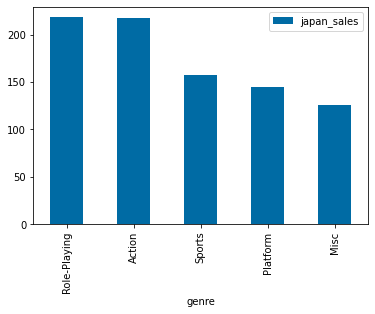

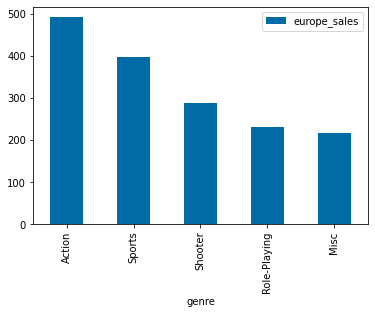

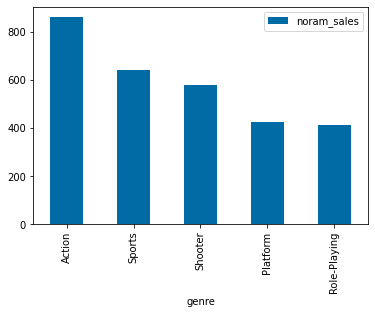

In [114]:
games.groupby(by='genre').agg({'japan_sales':'sum'}).sort_values(by='japan_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'europe_sales':'sum'}).sort_values(by='europe_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'noram_sales':'sum'}).sort_values(by='noram_sales', ascending=False).head(5).plot(kind='bar')

В Японе предпочитают ролевые игры, когда как в Европе и Северной Америке больше средств тратят на экшены.

<font size = '3'> **Задание 2:** В какие года пользователи были наиболее активны (больше всего покупали игры) </font>

<AxesSubplot:xlabel='year_of_release'>

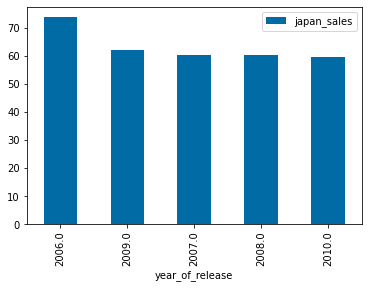

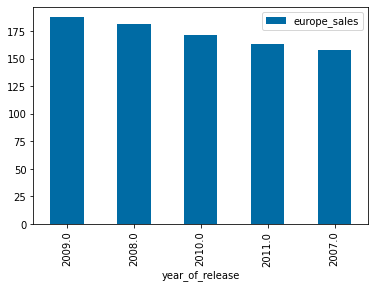

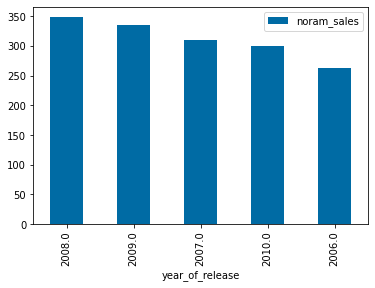

In [115]:
games.groupby(by='year_of_release').agg({'japan_sales':'sum'}).sort_values(by='japan_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='year_of_release').agg({'europe_sales':'sum'}).sort_values(by='europe_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='year_of_release').agg({'noram_sales':'sum'}).sort_values(by='noram_sales', ascending=False).head(5).plot(kind='bar')

В общем, когда рынок игровой рос, вот тогда все и покупали игры. +/- глобальный кризис.

<font size ='3'> **Задание 3:** топ-5 предпочтительных платформ </font>

<AxesSubplot:xlabel='platform'>

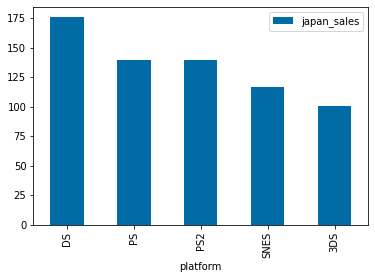

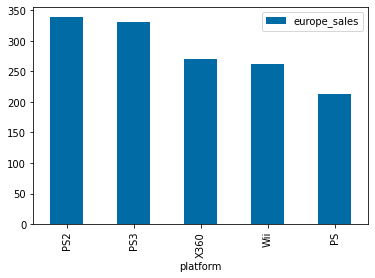

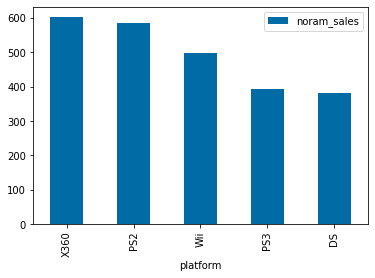

In [116]:
games.groupby(by='platform').agg({'japan_sales':'sum'}).sort_values(by='japan_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'europe_sales':'sum'}).sort_values(by='europe_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'noram_sales':'sum'}).sort_values(by='noram_sales', ascending=False).head(5).plot(kind='bar')

На родине Майкрософта доминирует он же. Европа любит приставку Японии. Россия играет в денди.

<font size = ' 3'> **Задание 4:**Какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

In [117]:
rating = pd.read_csv('/datasets/rating.csv')

In [118]:
rating

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [119]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating_type  8 non-null      object
 1   decryption   8 non-null      object
dtypes: object(2)
memory usage: 256.0+ bytes


In [120]:
games = games.merge(rating,on = 'rating_type',how = 'right')

In [121]:
games.head()

,name,platform,year_of_release,genre,noram_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating_type,total_sales,decryption
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Для всех
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Для всех
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Для всех
3,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,Для всех
4,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,Для всех


<AxesSubplot:xlabel='decryption'>

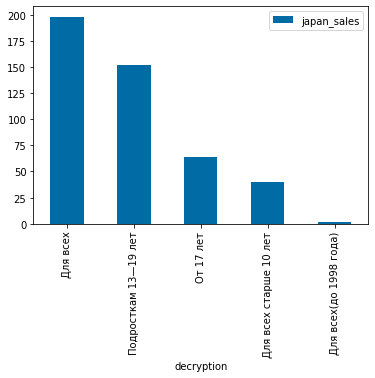

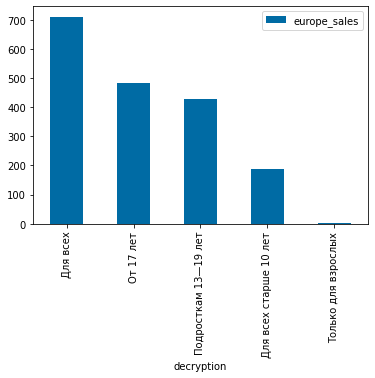

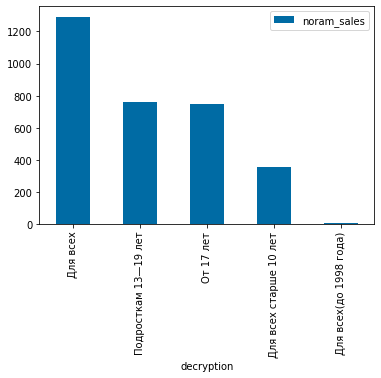

In [122]:
games.groupby(by='decryption').agg({'japan_sales':'sum'}).sort_values(by='japan_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='decryption').agg({'europe_sales':'sum'}).sort_values(by='europe_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='decryption').agg({'noram_sales':'sum'}).sort_values(by='noram_sales', ascending=False).head(5).plot(kind='bar')

In [123]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех(устар.)'}

In [124]:
games['ESRB_board'] = games[games['rating_type'].notnull()]['rating_type'].map(ESRB_dict)

<AxesSubplot:xlabel='ESRB_board'>

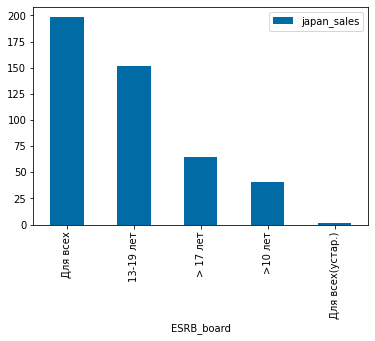

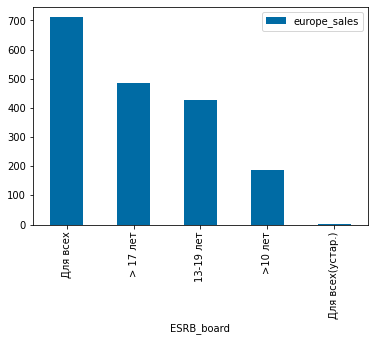

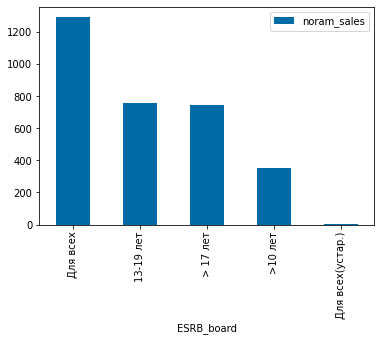

In [125]:
games.groupby(by='ESRB_board').agg({'japan_sales':'sum'}).sort_values(by='japan_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='ESRB_board').agg({'europe_sales':'sum'}).sort_values(by='europe_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='ESRB_board').agg({'noram_sales':'sum'}).sort_values(by='noram_sales', ascending=False).head(5).plot(kind='bar')

В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом "Для всех", поровну - с рейтингом "13-19 лет" и "для лиц старше 17 лет".

В Японии опять не так. Первое место такое же - "Для всех", а вот на втором - игры для лиц от 13 до 19 лет. Да, там играют с раннего детства.

# Проверка гипотез

Гипотизы:

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение alpha = 0.05

<b> Гипотеза № 1:</b>

средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [126]:
games.head()

,name,platform,year_of_release,genre,noram_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating_type,total_sales,decryption,ESRB_board
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Для всех,Для всех
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Для всех,Для всех
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Для всех,Для всех
3,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,Для всех,Для всех
4,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,Для всех,Для всех


In [127]:
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings)

print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -4.708594802853194
p-value = 2.8863541026e-06

Пороговое значение alpha = 0.05


Смело отклоняем нулевую гипотезу.
Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Посмотрим в чью пользу:

In [128]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xbox_one_ratings.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc_ratings.mean()))

Средняя оценка пользователей игр для платформы Xbox One  - 6.48
Средняя оценка пользователей игр для платформы PC - 7.08


Компьютерные игры получают оценки статистически значимо выше, чем игры для Xbox One. Неудивительно, Xbox One такого натерпелся в последнее время. Не зря у Microsoft осталась всего пара эксклюзивов - всё остальное ушло на PlayStation.

<b>Гипотеза № 2:</b>

средние пользовательские рейтинги жанров Action и Sports разные.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [129]:
action_ratings = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(action_ratings, pc_ratings)

print('t = {}\np-value = {:.4f}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.4852749857580196
p-value = 0.1376

Пороговое значение alpha = 0.05


Пороговое значение alpha = 0.05

Не можем отвергнуть нулевую гипотезу.
Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

# Общий Вывод

<b>По проведенному анализу:</b> самое сильное влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков. Оценки пользователей таким "влиянием" на выручку похвастаться не могут. Необходимо копать в эту сторону.

<b>В целом про положение дел в игровой индустрии:</b> рынок "немобильных" игр постепенно погибает. Все сейчас в погоне за графикой, новыми технологями, в связи с этим средний бюджет на разработку одной игры за последние годы заметно вырос. Более того, сейчас игрок не так ценит идею и глубины игры, большинство может обрадовать только хорошая картинка и оптимизация - а играть им понравится только в том случае, если в игре будут стрелочки куда идти. Иначе это слишком трудно.<br/><br/>
В итоге, гиганты игровой индустрии гоняются за технологиями, а более мелкие компании, не имеющие таких бюджетов, вынуждены отступать, т.к. единственный их козырь - способность создать глубокую игру с атмосферной - нынче не ценится.<br/>
Всё это привело к тому, что рынок уже который год падает. И, скорее всего, будет падать, потому что тенденции к изменению ценностей на те, которые были всего с десяток лет назад, нет.

<div class= 'alert alert-info'>
<b> Что обязательно стоит изменить: </b>

- [x] Изменить актуальный период
- [x] Изменить "ящики с усами"

</div>

<div class='alert alert-info'>

Если еще объязан что-то изменять, то с удовольствием исправлю.И если у вас ко мне какие советы или источники которые могут мне помочь в будущем, то я буду очень благодарен!!
    
    Cпасибо вам большое за ваш ревью,Маковеев Кирилл, хорошего вам вечера, и успехов в вашей работе!!😊✌
    
    Best Of Luck!!🙌
</div>